# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

### What are you being asked to do?

I am being asked to build a machine learning model for the NYC Taxi & Limousine Commission to predict whether a customer will not leave a tip. The model’s predictions will be used in an app to alert taxi drivers about potential non-tippers.

### What are the ethical implications of the model? What are the consequences of your model making errors?

The model has significant ethical concerns, as it could reinforce biases and lead to unfair treatment of certain passengers. If demographic data (e.g., race, gender, income) influence predictions, the model could institutionalize discrimination and perpetuate socioeconomic disparities.

False Negative: If the model incorrectly predicts a customer will not tip when they actually will, drivers may provide lower-quality service or even refuse rides, leading to discrimination, poor customer experiences, and lost income for both parties.
False Positive: If the model incorrectly predicts a customer will tip when they actually won’t, drivers may feel misled and financially disadvantaged, leading to frustration and potential resentment toward certain groups of passengers.

### Do the benefits of such a model outweigh the potential problems?
No, the risks outweigh the benefits. The model could introduce systemic bias, leading to unfair discrimination, customer mistreatment, and reputational damage for NYC TLC. Additionally, tipping behavior is highly variable and influenced by service quality, making prediction inherently unreliable.

### Would you proceed with the request to build this model? Why or why not?
No, I would not proceed. The model risks reinforcing socioeconomic and racial biases, unfairly influencing driver behavior, and leading to ethical and legal concerns. Additionally, the prediction may not be accurate enough to justify its use, making it unreliable for practical application.

### Can the objective be modified to make it less problematic?
Yes, instead of predicting who will not tip, the focus could be shifted to improving service quality and driver earnings. For example, a model could analyze factors that lead to higher tips (e.g., route efficiency, ride comfort, politeness) without targeting specific customers. This approach would provide actionable insights without introducing discriminatory risk.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-3 HERE


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [118]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [119]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [120]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
print(df0.dtypes)

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


Inspect the first few rows of `df0`.


In [121]:
# Inspect the first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [122]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [123]:
# Merge datasets
# print(f'df0.shape: {df0.shape}')
# print(f'nyc_preds_means.shape: {nyc_preds_means.shape}')
# combined_df = pd.concat([df0, nyc_preds_means], axis=1)
# combined_df.shape
df0 = df0.merge(nyc_preds_means,
                left_index=True,
                right_index=True)

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [124]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [125]:
# Subset the data to isolate only customers who paid by credit card
df0['payment_type'].unique() # unique ([1, 2, 3, 4]), 1 is for credit card
df1 = df0.copy()
mask = df1['payment_type'] == 1
df1 = df1[mask]
print(f'df0.shape: {df0.shape}')
print(f'df1.shape: {df1.shape}')

df0.shape: (22699, 21)
df1.shape: (15265, 21)


In [127]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)
df1.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
mean_duration            float64
mean_distance            float64
predicted_fare           float64
tip_percent              float64
dtype: object

In [128]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2) # True/False
df1['generous'] = df1['generous'].astype(int) # integer
print(df1.shape)
df1['generous'].value_counts()

(15265, 23)


generous
1    8035
0    7230
Name: count, dtype: int64

In [129]:
df1['tpep_pickup_datetime'].head(2)

0    03/25/2017 8:55:43 AM
1    04/11/2017 2:53:28 PM
Name: tpep_pickup_datetime, dtype: object

In [130]:
df1['tpep_dropoff_datetime'].head(2)

0    03/25/2017 9:09:47 AM
1    04/11/2017 3:19:58 PM
Name: tpep_dropoff_datetime, dtype: object

In [131]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [132]:
dir(df1['tpep_pickup_datetime'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'as_unit',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'mont

In [133]:
callable(df1['tpep_pickup_datetime'].dt.day_name)

True

In [134]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

In [135]:
callable(df1['tpep_pickup_datetime'].dt.hour)

False

In [136]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [137]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    '''
    hour is in format dt.hour access value
    '''
    return int(6 <= hour < 10)

In [138]:
# Apply 'am_rush' function to the 'am_rush' series
print(df1['am_rush'].head())
df1['am_rush'] = df1['am_rush'].apply(am_rush)
print(df1['am_rush'].head())

0     8
1    14
2     7
3    13
5    20
Name: am_rush, dtype: int32
0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64


Write functions to convert the three remaining columns and apply them to their respective series.

In [139]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    return int(10 >= hour < 16)

In [140]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1['daytime'].apply(daytime)

In [141]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    return int(16 >= hour < 20)

In [142]:
# Apply 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush)

In [143]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    return int(20 >= hour < 6)

In [144]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1['nighttime'].apply(nighttime)

In [145]:
callable(df1['tpep_pickup_datetime'].dt.month_name)

True

In [146]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examine the first five rows of your dataframe.

In [147]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,1,1,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,0,1,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,1,1,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,0,1,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,0,mar


In [148]:
# Drop columns
# 'payment_type', 'trip_distance', 'tip_amount', 'tip_percentage', 'total_amount', 'toll_amount'
# I am not understanding why we created tip_percentage and now we're not going to even used it?
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']
df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [160]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

print(f'dtypes before: {df1.dtypes}')
# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype(str)
print(f'\ndtypes after: {df1.dtypes}')

dtypes before: VendorID            object
passenger_count      int64
RatecodeID          object
PULocationID        object
DOLocationID        object
mean_duration      float64
mean_distance      float64
predicted_fare     float64
generous             int64
day                 object
am_rush              int64
daytime              int64
pm_rush              int64
nighttime            int64
month               object
dtype: object

dtypes after: VendorID            object
passenger_count      int64
RatecodeID          object
PULocationID        object
DOLocationID        object
mean_duration      float64
mean_distance      float64
predicted_fare     float64
generous             int64
day                 object
am_rush              int64
daytime              int64
pm_rush              int64
nighttime            int64
month               object
dtype: object


In [161]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: bool(338), float64(3), int64(6)
memory usage: 6.1 MB


In [162]:
# Get class balance of 'generous' col
print(df2['generous'].value_counts())
df2['generous'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

generous
1    8035
0    7230
Name: count, dtype: int64


generous
1    52.64%
0    47.36%
Name: proportion, dtype: object

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

- I also empirically believe False negatives are actually worse for the cab drivers too (so worse for both parties and from both points of view)...  Given the class imblanace of 52.64% generous tippers and 47.36% non generous tippers, assume what happens if all rides were predicted to be false positives so all of those rides were accepted vs. if all rides were predicted to be false negatives so all those rides were rejected. In the FP case, the drivers only stand to lose 47.36% of their earnings.  Contrastly, in the FN case, they stand to lose 52.64% of the earnings.  So from a drivers point of view, it would behoove them to favor recall also and avoid false negatives.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

key insight—that rejecting generous tippers due to false negatives leads to greater lost earnings than accepting non-tippers due to false positives—shifts the perspective toward prioritizing recall over precision.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [163]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop('generous', axis=1)
# print(f'features: {X.columns.values}')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (12212, 346)
X_test.shape: (3053, 346)
y_train.shape: (12212,)
y_test.shape: (3053,)


In [153]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit = 'f1')

In [154]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [155]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [156]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [157]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [158]:
write_pickle(path, rf_cv, 'rf_cv_becca')

Examine the best average score across all the validation folds. 

In [164]:
# Examine best score
rf_cv.best_score_

0.7149024319694319

Examine the best combination of hyperparameters.

In [165]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [166]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [167]:
cv_results = make_results('RandomForestClassifier Val', rf_cv, 'f1')
cv_results

,model,precision,recall,F1,accuracy
0,RandomForestClassifier Val,0.675242,0.759801,0.714902,0.681215


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

 - complexity
 - explainability
 - computation time

In [168]:
# Get scores on test data
rf_preds = rf_cv.best_estimator_.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [169]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [699]:
 # Get scores on test data
rf_test_scores = get_test_scores('RandomForestClassifier Test', rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,RandomForestClassifier Test,0.673139,0.776602,0.721179,0.683917


In [700]:
rf_combined_results = pd.concat([cv_results, rf_test_scores])
rf_combined_results

,model,precision,recall,F1,accuracy
0,RandomForestClassifier Val,0.674701,0.757934,0.713778,0.680233
0,RandomForestClassifier Test,0.673139,0.776602,0.721179,0.683917


**Question:** How do your test results compare to your validation results?

- slightly better with the tuned hyperparameters.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.


In [701]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [702]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [703]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 21 s, sys: 91.6 ms, total: 21.1 s
Wall time: 11 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

In [704]:
# Examine best score
xgb_cv.best_score_

0.6932464990995477

And the best parameters.

In [705]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [706]:
# Call 'make_results()' on the GridSearch object
xgb_val_results = make_results('XGBoost Val', xgb_cv, 'f1')
xgb_val_results

,model,precision,recall,F1,accuracy
0,XGBoost Val,0.67059,0.717797,0.693246,0.665739


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [707]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [708]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGBoost Test', xgb_preds, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGBoost Test,0.680556,0.76229,0.719108,0.686538


In [709]:
xgb_combined_results = pd.concat([xgb_val_results, xgb_test_scores])
xgb_combined_results

,model,precision,recall,F1,accuracy
0,XGBoost Val,0.670590,0.717797,0.693246,0.665739
0,XGBoost Test,0.680556,0.762290,0.719108,0.686538


In [710]:
rf_xgb_combined_results = pd.concat([rf_combined_results, xgb_combined_results])
# Sort master results by F1 score in descending order
rf_xgb_combined_results.sort_values(by=['F1'], ascending=False)

,model,precision,recall,F1,accuracy
0,RandomForestClassifier Test,0.673139,0.776602,0.721179,0.683917
0,XGBoost Test,0.680556,0.762290,0.719108,0.686538
0,RandomForestClassifier Val,0.674701,0.757934,0.713778,0.680233
0,XGBoost Val,0.670590,0.717797,0.693246,0.665739


In [711]:
rf_xgb_combined_results.to_csv(path + 'rf_xgb_combined_results.csv', index=False) 

**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

- RandomForestClassifier Test has the best f1 score

Plot a confusion matrix of the model's predictions on the test data.

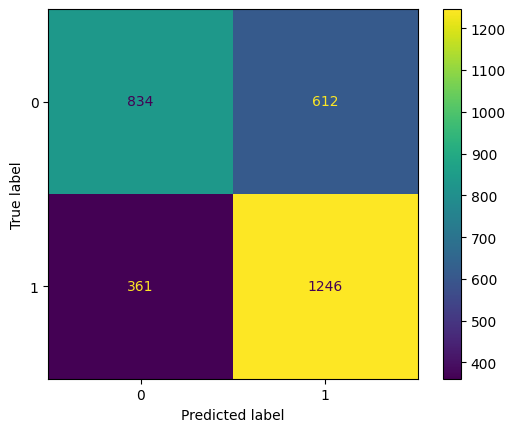

In [170]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=rf_cv.classes_)
disp.plot(values_format='')
plt.show()

**Question:** What type of errors are more common for your model?

- False negatives are less common, which is what I was going for.  Prior in my explanation above, I believe false negatives to be both psychologically and monetarily at a disadvantage to the driver.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

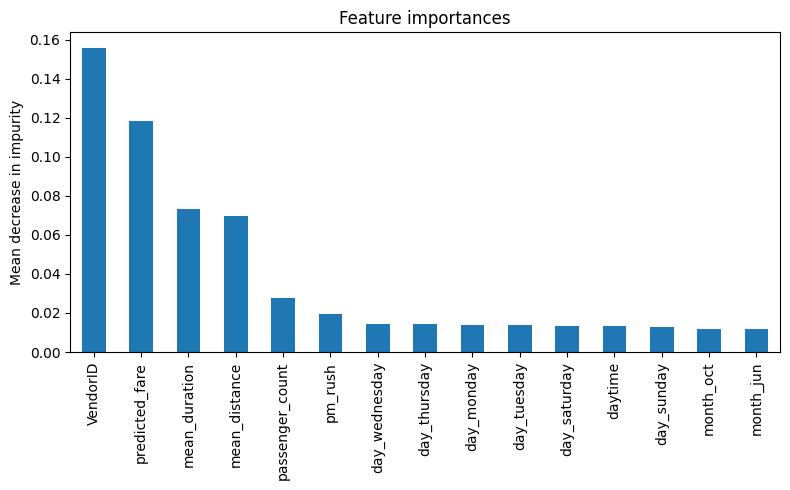

In [714]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.